# **Project: Insurance Cost Analysis**

In this project, I performed analytics operations on an insurance database using the paramaters below.

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 
|charges| Annual Insurance charges in USD | float|

## Objectives 
In this project, I:
 - Loaded the data as a `pandas` dataframe
 - Cleaned the data, taking care of the blank entries
 - Ran exploratory data analysis (EDA) and identify the attributes that most affect the `charges`
 - Developed single variable and multi variable Linear Regression models for predicting the `charges`
 - Used Ridge regression to refine the performance of Linear regression models. 
 


# Setup


For this lab, I used the following libraries and their following uses are listed:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Importing Required Libraries

_I recommend you import all required libraries in one place (here):_


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [16]:
#path to the needed dataset
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

# Task 1 : Importing the dataset


In [17]:
df = pd.read_csv(path, header = None) # puts the data in a dataframe
df.head(10)#pulls the first 10 entries

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


Then added the headers to the dataframe, as mentioned in the project parameters.


In [18]:
headers = ['age','gender', 'BMI', 'No of Children', 'Smoker','Region', 'Charges']#assigns the header names
df.columns = headers#assigns headers to the columns

In [19]:
df.replace('?',np.nan, inplace = True)# replaces the values with NaN

# Task 2 : Data Wrangling


In [20]:
df.info()# identifies the columns with Non-Null and Null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   BMI             2772 non-null   float64
 3   No of Children  2772 non-null   int64  
 4   Smoker          2765 non-null   object 
 5   Region          2772 non-null   int64  
 6   Charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [21]:
#categorical data should be replaced with the mode
is_smoker = df['Smoker'].value_counts().idxmax()# extracts the mode value which is people being smokers
df['Smoker'].replace (np.nan, is_smoker, inplace = True)# places the null values with the mode

#Continous data should be replaced with the mean
age_mean = df['age'].astype('float').mean(axis=0) # extracts the mean age within a variable
df['age'].replace(np.nan,age_mean,inplace = True) # puts the mean within the null values
df[['age','Smoker']] = df[['age','Smoker']].astype('int') # Convert the datatype of these columns to an integer
df.info()# load the data for updates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int32  
 1   gender          2772 non-null   int64  
 2   BMI             2772 non-null   float64
 3   No of Children  2772 non-null   int64  
 4   Smoker          2772 non-null   int32  
 5   Region          2772 non-null   int64  
 6   Charges         2772 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.1 KB


In [22]:
#round the data set 'charges' to the 2nd decimal value
df[['Charges']] = np.round(df[['Charges']],2)
df.head()

,age,gender,BMI,No of Children,Smoker,Region,Charges
0,19,1,27.900,0,1,3,16884.92
1,18,2,33.770,1,0,4,1725.55
2,28,2,33.000,3,0,4,4449.46
3,33,2,22.705,0,0,1,21984.47
4,32,2,28.880,0,0,1,3866.86


# Task 3 : Exploratory Data Analysis (EDA)



(0.0, 66902.85800000001)

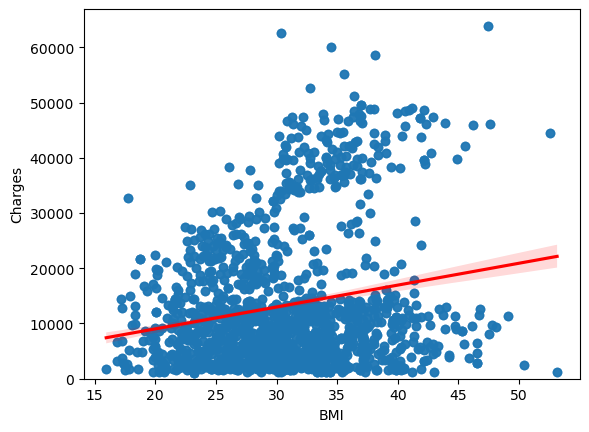

In [23]:
sns.regplot(x = 'BMI', y = 'Charges', data = df, line_kws= {'color':'Red'})# regression plot with a red trend line and respect to the BMI
plt.ylim(0,)

<Axes: xlabel='Smoker', ylabel='Charges'>

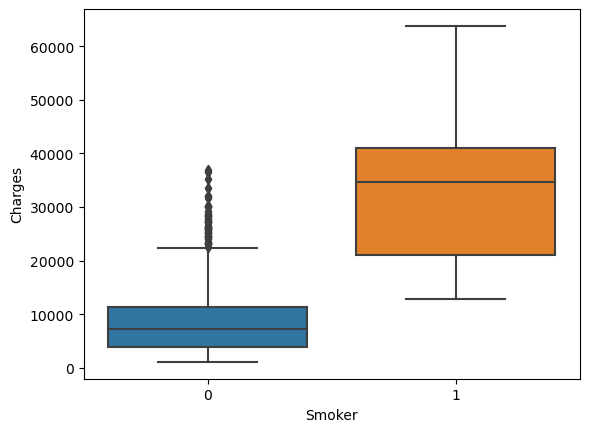

In [24]:
sns.boxplot(x = 'Smoker', y = 'Charges', data = df)# box plot with respect to the smoker category

<Axes: xlabel='No of Children', ylabel='Charges'>

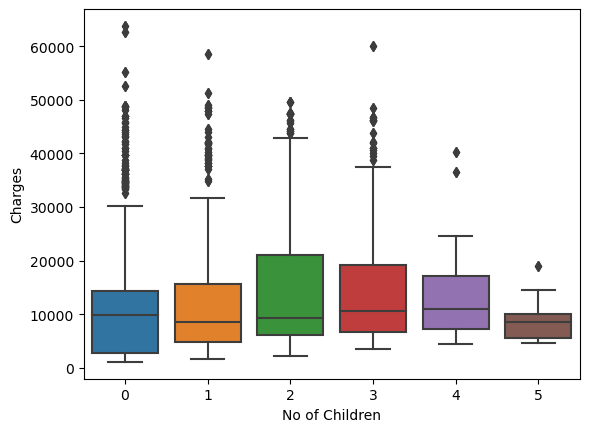

In [25]:
sns.boxplot(x = 'No of Children', y = 'Charges', data = df)#a box plot for charges according to the No of children

In [26]:
df.corr()#Finding the correlation across all values

,age,gender,BMI,No of Children,Smoker,Region,Charges
age,1.000000,-0.026046,0.113048,0.037574,-0.023286,-0.007167,0.298624
gender,-0.026046,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
BMI,0.113048,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
No of Children,0.037574,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
Smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
Region,-0.007167,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
Charges,0.298624,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


# Task 4 : Model Development


In [27]:
#Creating a singular Linear regression
X = df[['Smoker']]#store variable
Y = df['Charges']#store variable
lm = LinearRegression()#creating a shortcut
lm.fit(X,Y)#fitting the model for optimization
print(lm.score(X,Y))#finding the R squared between the the correlation of smokers and charges

0.6221791733924185


In [28]:
#creating a Multiple Linear regression
Z = df[['age','gender', 'BMI', 'No of Children', 'Smoker','Region']]#store multiple columns in one variable
lm.fit(Z,Y)#fit for model optimization
print(lm.score(Z,Y))# Finding the R squared between the Multiple Linear Regression and the Charges

0.7504083820289634


In [29]:
#Creating the pipeline for predicting values
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]# store the pipe functions in a singular variable
pipe=Pipeline(Input)#create pipe
pipe.fit(Z,Y)#Fit the pipe for optimization
ypipe=pipe.predict(Z)# store the predicted yvalues using the predict function and the stored dataframe
print(r2_score(Y,ypipe))# Find the R squared using the price value and predicted price value

0.8452574046807049


# Task 5 : Model Refinement

Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.


In [30]:
x_train, x_test, y_train, y_test = train_test_split(Z,Y,test_size =.2, random_state = 1)#initialize all testing and training variables with a test size of 20%

In [31]:
#initializing a Ridge Regressor
RidgeModel = Ridge(alpha=.1)# Set the hyperparamter to .1
RidgeModel.fit(x_train,y_train)# fit the training data together for optimization
yhat = RidgeModel.predict(x_test)#put the predication data to the test using test data
r2_score(y_test,yhat)#find the coefficent of the determinant using the prediction and the actual data

0.6760807731582408

In [32]:
#Apply PolynomialFeatures to the training parameters with a 2nd degree
pr = PolynomialFeatures(degree = 2)
x_train_pr = pr.fit_transform(x_train)#Transofrming training data to the PolynomialFeatures 
x_test_pr = pr.fit_transform(x_test)#Transforming testing data to the PolynomialFeatures
RidgeModel.fit(x_train_pr,y_train)#fitting the new model features
y_hat =RidgeModel.predict(x_test_pr)# creating a new deployment model for better correlation
r2_score(y_test,y_hat) #Final R squared score

0.7835631107608149

## Authors


James Ryan Price
